# Data Science HW1 B10915020 陳珮婕

#### 前置準備

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!pip3 install numpy scipy pandas matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Mounted at /content/gdrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### 讀入資料

In [ ]:
data2=pd.read_csv('/content/gdrive/MyDrive/資料科學導論/hw1/train.csv', index_col=None)
predict_data2=pd.read_csv('/content/gdrive/MyDrive/資料科學導論/hw1/test.csv', index_col=None)

## 執行

###  資料預處理

In [ ]:
# print(data2.head())
data=pd.DataFrame(data2.copy())
predict_data=predict_data2.copy()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17103 entries, 0 to 17102
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Attribute1   17103 non-null  object 
 1   Attribute2   17103 non-null  int64  
 2   Attribute3   17032 non-null  float64
 3   Attribute4   17071 non-null  float64
 4   Attribute5   16942 non-null  float64
 5   Attribute6   9702 non-null   float64
 6   Attribute7   8872 non-null   float64
 7   Attribute8   16010 non-null  object 
 8   Attribute9   16017 non-null  float64
 9   Attribute10  16671 non-null  object 
 10  Attribute11  16797 non-null  float64
 11  Attribute12  16688 non-null  float64
 12  Attribute13  15434 non-null  float64
 13  Attribute14  10151 non-null  float64
 14  Attribute15  16809 non-null  float64
 15  Attribute16  16942 non-null  object 
 16  Attribute17  17103 non-null  object 
dtypes: float64(11), int64(1), object(5)
memory usage: 2.2+ MB
None


In [ ]:
data=data.drop(['Attribute1'],axis=1)
predict_data=predict_data.drop(['Attribute1'],axis=1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17103 entries, 0 to 17102
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Attribute2   17103 non-null  int64  
 1   Attribute3   17032 non-null  float64
 2   Attribute4   17071 non-null  float64
 3   Attribute5   16942 non-null  float64
 4   Attribute6   9702 non-null   float64
 5   Attribute7   8872 non-null   float64
 6   Attribute8   16010 non-null  object 
 7   Attribute9   16017 non-null  float64
 8   Attribute10  16671 non-null  object 
 9   Attribute11  16797 non-null  float64
 10  Attribute12  16688 non-null  float64
 11  Attribute13  15434 non-null  float64
 12  Attribute14  10151 non-null  float64
 13  Attribute15  16809 non-null  float64
 14  Attribute16  16942 non-null  object 
 15  Attribute17  17103 non-null  object 
dtypes: float64(11), int64(1), object(4)
memory usage: 2.1+ MB
None


#### 補上8、10

In [ ]:
for i in data.index:
  if(pd.isnull(data.loc[i,"Attribute8"])):
    data.loc[i,"Attribute8"]=data.loc[i,"Attribute10"]
  if(pd.isnull(data.loc[i,"Attribute10"])):
    data.loc[i,"Attribute10"]=data.loc[i,"Attribute8"]
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17103 entries, 0 to 17102
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Attribute2   17103 non-null  int64  
 1   Attribute3   17032 non-null  float64
 2   Attribute4   17071 non-null  float64
 3   Attribute5   16942 non-null  float64
 4   Attribute6   9702 non-null   float64
 5   Attribute7   8872 non-null   float64
 6   Attribute8   16775 non-null  object 
 7   Attribute9   16017 non-null  float64
 8   Attribute10  16775 non-null  object 
 9   Attribute11  16797 non-null  float64
 10  Attribute12  16688 non-null  float64
 11  Attribute13  15434 non-null  float64
 12  Attribute14  10151 non-null  float64
 13  Attribute15  16809 non-null  float64
 14  Attribute16  16942 non-null  object 
 15  Attribute17  17103 non-null  object 
dtypes: float64(11), int64(1), object(4)
memory usage: 2.1+ MB
None


#### 所有特徵補上中位數

In [ ]:
data[(data["Attribute16"]=="No")&(data["Attribute5"].isnull())]["Attribute5"].fillna(value=0.0, inplace=True)
place=data["Attribute2"].unique().tolist()
for i in range(3,16):
  if((i!=8)&(i!=10)):
    add_data="Attribute"+str(i)
    place_data=data[["Attribute2",add_data]]
    place_data=place_data.dropna()
    place_data.reset_index(drop=True)
    #print(place_data.info())
    value=[]
    all_average=place_data[add_data].median()
    for i in place:
      average_data = place_data[(place_data["Attribute2"]==i)][add_data].median()
    #print(average_data)
      value.append(average_data)
    #print(value)

    for i in range(0,len(place)):
      data[data["Attribute2"]==place[i]][add_data].fillna(value=value[i], inplace=True)

    data[add_data].fillna(value=all_average, inplace=True)
    #print(data.info())


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

#### dropna+特徵8、10、16、17轉成數字(string)

In [ ]:
data=data.dropna()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16622 entries, 0 to 17102
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Attribute2   16622 non-null  int64  
 1   Attribute3   16622 non-null  float64
 2   Attribute4   16622 non-null  float64
 3   Attribute5   16622 non-null  float64
 4   Attribute6   16622 non-null  float64
 5   Attribute7   16622 non-null  float64
 6   Attribute8   16622 non-null  object 
 7   Attribute9   16622 non-null  float64
 8   Attribute10  16622 non-null  object 
 9   Attribute11  16622 non-null  float64
 10  Attribute12  16622 non-null  float64
 11  Attribute13  16622 non-null  float64
 12  Attribute14  16622 non-null  float64
 13  Attribute15  16622 non-null  float64
 14  Attribute16  16622 non-null  object 
 15  Attribute17  16622 non-null  object 
dtypes: float64(11), int64(1), object(4)
memory usage: 2.2+ MB
None


In [ ]:
data=data.reset_index(drop=True)
#print(data.info())

In [ ]:
direction_8=data["Attribute8"].unique().tolist()
direction_10=data["Attribute10"].unique().tolist()
print(list(set(direction_8).symmetric_difference(set(direction_10))))
direction=direction_10
for i in data.index:
  for j in range(0,len(direction)):
   if(data.loc[i,'Attribute8']==direction[j]):
       data.loc[i,'Attribute8']=str(j)
   if(data.loc[i,'Attribute10']==direction[j]):
       data.loc[i,'Attribute10']=str(j)
print(data.head())
for i in predict_data.index:
  for j in range(0,len(direction)):
   if(predict_data.loc[i,'Attribute8']==direction[j]):
       predict_data.loc[i,'Attribute8']=str(j)
   if(predict_data.loc[i,'Attribute10']==direction[j]):
       predict_data.loc[i,'Attribute10']=str(j)

[]
   Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  Attribute7  \
0           2         9.2        28.0         0.0         4.8         8.6   
1           2         7.7        26.7         0.0         4.8         8.6   
2           2        15.9        21.7         2.2         4.8         8.6   
3           2        15.9        18.6        15.6         4.8         8.6   
4           2        13.7        37.9         0.0         4.8         8.6   

  Attribute8  Attribute9 Attribute10  Attribute11  Attribute12  Attribute13  \
0         14        24.0           0          9.0         16.0       1012.8   
1          1        35.0           1         17.0         19.0       1010.1   
2          8        31.0           2         13.0         91.0       1004.2   
3          1        61.0           3         28.0         93.0        993.0   
4          1        52.0           4         26.0          8.0       1006.7   

   Attribute14  Attribute15 Attribute16 Attribute17  
0    

In [ ]:
rain=data["Attribute17"].unique().tolist()
for i in data.index:
  if(data.loc[i,'Attribute17']=='Yes'):
    data.loc[i,'Attribute17']="1"
  else:
    data.loc[i,'Attribute17']="0"
  if(data.loc[i,'Attribute16']=='Yes'):
    data.loc[i,'Attribute16']="1"
  else:
    data.loc[i,'Attribute16']="0"

for i in predict_data.index:
  if(predict_data.loc[i,'Attribute16']=='Yes'):
    predict_data.loc[i,'Attribute16']="1"
  else:
    predict_data.loc[i,'Attribute16']="0"
#print(data.head())

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16622 entries, 0 to 16621
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Attribute2   16622 non-null  int64  
 1   Attribute3   16622 non-null  float64
 2   Attribute4   16622 non-null  float64
 3   Attribute5   16622 non-null  float64
 4   Attribute6   16622 non-null  float64
 5   Attribute7   16622 non-null  float64
 6   Attribute8   16622 non-null  object 
 7   Attribute9   16622 non-null  float64
 8   Attribute10  16622 non-null  object 
 9   Attribute11  16622 non-null  float64
 10  Attribute12  16622 non-null  float64
 11  Attribute13  16622 non-null  float64
 12  Attribute14  16622 non-null  float64
 13  Attribute15  16622 non-null  float64
 14  Attribute16  16622 non-null  object 
 15  Attribute17  16622 non-null  object 
dtypes: float64(11), int64(1), object(4)
memory usage: 2.0+ MB
None


### 準備模型

In [ ]:
!pip3 install sklearn datetime joblib seaborn
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_data=data.copy()

Xdata_2 = train_data.drop(columns='Attribute17')
Ydata_2 = data['Attribute17'].astype(str)
#X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata , test_size=0.2, random_state=20)
#y_train_print=pd.Series(Ydata)
#print(y_train_print.value_counts())

做SMOTE處理


In [ ]:
from imblearn.over_sampling import SMOTE
Xdata, Ydata = SMOTE().fit_resample(Xdata_2, Ydata_2)
y_train_print=pd.Series(Ydata)
print(y_train_print.value_counts())


0    13614
1    13614
Name: Attribute17, dtype: int64


輸出

In [ ]:
def output(name,Y_pred_model,train_score,test_score):
  acc_model = round(train_score * 100, 2)
  acc_model_test = round(test_score * 100, 2)
  model_precision = round( precision_score(y_test, Y_pred_model, average="macro") * 100, 2)
  #print(y_test, Y_pred_model)
  model_recall = round( recall_score(y_test, Y_pred_model, average="macro") * 100, 2)
  model_fscore = round( f1_score(y_test, Y_pred_model, average="macro") * 100, 2)


  models = pd.DataFrame({
    'Train': [name],
    'accuracy': [acc_model],
    'test': [acc_model_test],
    'precision': [model_precision],
    'recall': [model_recall],
    'fscore': [model_fscore],
  })

  models.sort_values(by='accuracy', ascending=False)
  print(models)

In [ ]:
piece=2269

#### 決策樹

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treeNumber=20
Dtree=DecisionTreeClassifier(max_depth=treeNumber)
'''

Dtree.fit(X_train, y_train)
Y_pred_Dtree = Dtree.predict(X_test)
acc_Dtree = Dtree.score(X_train, y_train)
acc_Dtree_test = Dtree.score(X_test, y_test)
output('KNN_5times_train_'+str(i),Y_pred_Dtree,acc_Dtree,acc_Dtree_test)
'''
for i in range(0,2):#5 #1
  X_test=Xdata.iloc[piece*i:piece*(i+1)]
  y_test=Ydata.iloc[piece*i:piece*(i+1)]
  X_train=pd.concat([Xdata,X_test,X_test]).drop_duplicates(keep=False)
  if(i==0):
    temp=0
  else:
    temp=piece*i
  y_train=pd.concat([Ydata.iloc[0:temp],Ydata.iloc[piece*(i+1):27228]])
  Dtree.fit(X_train, y_train)
  Y_pred_Dtree = Dtree.predict(X_test)
  acc_Dtree = Dtree.score(X_train, y_train)
  acc_Dtree_test = Dtree.score(X_test, y_test)
  output('tree_train_'+str(i),Y_pred_Dtree,acc_Dtree,acc_Dtree_test)

          Train  accuracy   test  precision  recall  fscore
0  tree_train_0     99.58  79.24      67.35   74.14   69.24
          Train  accuracy   test  precision  recall  fscore
0  tree_train_1     99.29  75.19       66.1   72.27   67.34


In [ ]:
predict_result_tree = Dtree.predict(predict_data)
'''
Y_pred = Dtree.predict(predict_data)
predict_result_tree = pd.DataFrame(Y_pred)
predict_result.rename( columns={0: 'ans'}, inplace=True)
predict_ID=predict_data2.index.astype(str)+".0"
print(predict_ID.dtype)
predict_ID=pd.DataFrame(predict_ID)
predict_dataframe = pd.concat([predict_ID,predict_result],axis=1)
predict_dataframe.columns=['id','ans']
print(predict_dataframe['id'].dtype)
predict_dataframe.to_csv('/content/gdrive/MyDrive/資料科學導論/hw1/tree2_ans_test.csv',index=False)
'''

'\nY_pred = Dtree.predict(predict_data)\npredict_result_tree = pd.DataFrame(Y_pred)\npredict_result.rename( columns={0: \'ans\'}, inplace=True)\npredict_ID=predict_data2.index.astype(str)+".0"\nprint(predict_ID.dtype)\npredict_ID=pd.DataFrame(predict_ID)\npredict_dataframe = pd.concat([predict_ID,predict_result],axis=1)\npredict_dataframe.columns=[\'id\',\'ans\']\nprint(predict_dataframe[\'id\'].dtype)\npredict_dataframe.to_csv(\'/content/gdrive/MyDrive/資料科學導論/hw1/tree2_ans_test.csv\',index=False)\n'

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors = 5)
'''
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = knn.score(X_train, y_train)
acc_knn_test = knn.score(X_test, y_test)
output('KNN_5times_train_'+str(i),Y_pred_knn,acc_knn,acc_knn_test)
#2878
'''
for i in range(0,2):#2
  X_test=Xdata.iloc[piece*i:piece*(i+1)]
  y_test=Ydata.iloc[piece*i:piece*(i+1)]
  X_train=pd.concat([Xdata,X_test,X_test]).drop_duplicates(keep=False)
  if(i==0):
    temp=0
  else:
    temp=piece*i
  y_train=pd.concat([Ydata.iloc[0:temp],Ydata.iloc[piece*(i+1):27228]])
  knn.fit(X_train, y_train)
  Y_pred_knn = knn.predict(X_test)
  acc_knn = knn.score(X_train, y_train)
  acc_knn_test = knn.score(X_test, y_test)
  output('KNN_5times_train_'+str(i),Y_pred_knn,acc_knn,acc_knn_test)

                Train  accuracy   test  precision  recall  fscore
0  KNN_5times_train_0     91.38  74.04      68.89   82.94   68.52
                Train  accuracy   test  precision  recall  fscore
0  KNN_5times_train_1     91.58  66.81      67.87   78.55   63.79


In [ ]:
predict_result_knn = knn.predict(predict_data)
'''
Y_pred = knn.predict(predict_data)
predict_result_knn = pd.DataFrame(Y_pred)
predict_result.rename( columns={0: 'ans'}, inplace=True)
predict_ID=predict_data2.index.astype(str)+".0"
print(predict_ID.dtype)
predict_ID=pd.DataFrame(predict_ID)
predict_dataframe = pd.concat([predict_ID,predict_result],axis=1)
predict_dataframe.columns=['id','ans']
print(predict_dataframe['id'].dtype)
predict_dataframe.to_csv('/content/gdrive/MyDrive/資料科學導論/hw1/knn_5_ans_test.csv',index=False)
'''

'\nY_pred = knn.predict(predict_data)\npredict_result_knn = pd.DataFrame(Y_pred)\npredict_result.rename( columns={0: \'ans\'}, inplace=True)\npredict_ID=predict_data2.index.astype(str)+".0"\nprint(predict_ID.dtype)\npredict_ID=pd.DataFrame(predict_ID)\npredict_dataframe = pd.concat([predict_ID,predict_result],axis=1)\npredict_dataframe.columns=[\'id\',\'ans\']\nprint(predict_dataframe[\'id\'].dtype)\npredict_dataframe.to_csv(\'/content/gdrive/MyDrive/資料科學導論/hw1/knn_5_ans_test.csv\',index=False)\n'

#### Logistic Regression

In [ ]:
from sklearn import linear_model
lr=linear_model.LogisticRegression()#初始化資料
'''
lr.fit(X_train,y_train)#丟入資料
Y_pred_lr = lr.predict(X_test)
acc_lr = lr.score(X_train, y_train)
acc_lr_test = lr.score(X_test, y_test)
output('LR_train_',Y_pred_lr,acc_lr,acc_lr_test)
'''
for i in range(0,3):#4
  X_test=Xdata.iloc[piece*i:piece*(i+1)]
  y_test=Ydata.iloc[piece*i:piece*(i+1)]
  X_train=pd.concat([Xdata,X_test,X_test]).drop_duplicates(keep=False)
  if(i==0):
    temp=0
  else:
    temp=piece*i
  y_train=pd.concat([Ydata.iloc[0:temp],Ydata.iloc[piece*(i+1):27228]])
  lr.fit(X_train,y_train)#丟入資料
  Y_pred_lr = lr.predict(X_test)
  acc_lr = lr.score(X_train, y_train)
  acc_lr_test = lr.score(X_test, y_test)
  output('LR_train_'+str(i),Y_pred_lr,acc_lr,acc_lr_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


        Train  accuracy   test  precision  recall  fscore
0  LR_train_0     77.86  79.73      69.28   78.76   71.42


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


        Train  accuracy   test  precision  recall  fscore
0  LR_train_1     78.36  75.54      68.42   77.15   69.47


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


        Train  accuracy   test  precision  recall  fscore
0  LR_train_2     78.65  69.59      64.44   73.37   63.62


In [ ]:
predict_result_lr = lr.predict(predict_data)
'''
Y_pred = lr.predict(predict_data)
predict_result_lr = pd.DataFrame(Y_pred)
predict_result_lr.rename( columns={0: 'ans'}, inplace=True)
predict_ID=predict_data2.index.astype(str)+".0"
print(predict_ID.dtype)
predict_ID=pd.DataFrame(predict_ID)
predict_dataframe = pd.concat([predict_ID,predict_result_lr],axis=1)
predict_dataframe.columns=['id','ans']
print(predict_dataframe['id'].dtype)
predict_dataframe.to_csv('/content/gdrive/MyDrive/資料科學導論/hw1/lr_ans_test.csv',index=False)
'''

'\nY_pred = lr.predict(predict_data)\npredict_result_lr = pd.DataFrame(Y_pred)\npredict_result_lr.rename( columns={0: \'ans\'}, inplace=True)\npredict_ID=predict_data2.index.astype(str)+".0"\nprint(predict_ID.dtype)\npredict_ID=pd.DataFrame(predict_ID)\npredict_dataframe = pd.concat([predict_ID,predict_result_lr],axis=1)\npredict_dataframe.columns=[\'id\',\'ans\']\nprint(predict_dataframe[\'id\'].dtype)\npredict_dataframe.to_csv(\'/content/gdrive/MyDrive/資料科學導論/hw1/lr_ans_test.csv\',index=False)\n'

### 合併測試

In [ ]:
predict_result=[]
for i in range(0,len(predict_result_tree)):
  TREE=int(predict_result_tree[i])
  KNN=int(predict_result_knn[i])
  LR=int(predict_result_lr[i])
  ans=TREE+KNN+LR
  if(ans>=1):
    predict_result.append('1')
  else:
    predict_result.append('0')
  #print(ans)
predict_result = pd.DataFrame(predict_result)
predict_result.rename( columns={0: 'ans'}, inplace=True)
predict_ID=predict_data2.index.astype(str)+".0"
print(predict_ID.dtype)
predict_ID=pd.DataFrame(predict_ID)
predict_dataframe = pd.concat([predict_ID,predict_result],axis=1)
predict_dataframe.columns=['id','ans']
print(predict_dataframe['id'].dtype)
predict_dataframe.to_csv('/content/gdrive/MyDrive/資料科學導論/hw1/combine34_ans_test.csv',index=False)

object
object


## 不使用的code

### 不用的特徵

#### 特徵5、6

In [ ]:
data[(data["Attribute16"]=="No")&(data["Attribute5"].isnull())]["Attribute5"].fillna(value=0.0, inplace=True)
place=data["Attribute2"].unique().tolist()
place_rain=data[["Attribute2","Attribute6"]]
place_rain=place_rain.dropna()
place_rain.reset_index(drop=True)
print(place_rain.info())
value=[]
all_average=place_rain["Attribute6"].mean()
for i in place:
  average_rain=place_rain[(place_rain["Attribute2"]==i)]["Attribute6"].mean()
  #print(average_rain)
  value.append(average_rain)
print(value)

for i in range(0,len(place)):
  data[data["Attribute2"]==place[i]]["Attribute6"].fillna(value=value[i], inplace=True)

data["Attribute6"].fillna(value=all_average, inplace=True)
print(data.info())

#### 特徵7

In [ ]:
place=data["Attribute2"].unique().tolist()
place_sunshine=data[["Attribute2","Attribute7"]]
place_sunshine=place_sunshine.dropna()
place_sunshine.reset_index(drop=True)
print(place_sunshine.info())
value=[]
all_average=place_sunshine["Attribute7"].mean()
for i in place:
  average_sunshine=place_sunshine[(place_sunshine["Attribute2"]==i)]["Attribute7"].mean()
  #print(average_sunshine)
  value.append(average_sunshine)
print(value)

for i in range(0,len(place)):
  data[data["Attribute2"]==place[i]]["Attribute7"].fillna(value=value[i], inplace=True)

data["Attribute7"].fillna(value=all_average, inplace=True)
print(data.info())

#### 特徵14

In [ ]:
place=data["Attribute2"].unique().tolist()
sunshine_hour=data[["Attribute2","Attribute14"]]
sunshine_hour=sunshine_hour.dropna()
sunshine_hour.reset_index(drop=True)
print(sunshine_hour.info())
value=[]
all_average=sunshine_hour["Attribute14"].mean()
for i in place:
  average_sunshine=sunshine_hour[(sunshine_hour["Attribute2"]==i)]["Attribute14"].mean()
  #print(average_sunshine)
  value.append(average_sunshine)
print(value)

for i in range(0,len(place)):
  data[data["Attribute2"]==place[i]]["Attribute14"].fillna(value=value[i], inplace=True)

data["Attribute14"].fillna(value=all_average, inplace=True)
print(data.info())

### 不用的model

#### Lsvc

In [ ]:
from sklearn import svm
Lsvc = svm.LinearSVC(C=10)
'''
Lsvc.fit(X_train,y_train)
Y_pred_Lsvc=Lsvc.predict(X_test)
Lsvc_train_score=Lsvc.score(X_train, y_train)
Lsvc_test_score=Lsvc.score(X_test, y_test)
output("Linear SVC",Y_pred_Lsvc,Lsvc_train_score,Lsvc_test_score)
'''
for i in range(0,1):
  X_test=Xdata.iloc[piece*i:piece*(i+1)]
  y_test=Ydata.iloc[piece*i:piece*(i+1)]
  X_train=pd.concat([Xdata,X_test,X_test]).drop_duplicates(keep=False)
  if(i==0):
    temp=0
  else:
    temp=piece*i
  y_train=pd.concat([Ydata.iloc[0:temp],Ydata.iloc[piece*(i+1):27414]])
  Lsvc.fit(X_train,y_train)#丟入資料
  Y_pred_Lsvc = Lsvc.predict(X_test)
  acc_Lsvc = Lsvc.score(X_train, y_train)
  acc_Lsvc_test = Lsvc.score(X_test, y_test)
  output('Linear SVC'+str(i),Y_pred_Lsvc,acc_Lsvc,acc_Lsvc_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


         Train  accuracy   test  precision  recall  fscore
0  Linear SVC0     75.52  84.75      73.05   76.29   74.44


In [ ]:
predict_result_Lsvc = Lsvc.predict(predict_data)

#### SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True)#初始化演算法
'''
svm.fit(X_train, y_train)#把資料丟入演算法
Y_pred_svm = svm.predict(X_test)
acc_svm = svm.score(X_train, y_train)
acc_svm_test = svm.score(X_test, y_test)
output('KNN_5times_train_'+str(i),Y_pred_svm,acc_svm,acc_svm_test)
'''
for i in range(0,6):
  X_test=Xdata.iloc[piece*i:piece*(i+1)]
  y_test=Ydata.iloc[piece*i:piece*(i+1)]
  X_train=pd.concat([Xdata,X_test,X_test]).drop_duplicates(keep=False)
  if(i==0):
    temp=0
  else:
    temp=piece*i
  y_train=pd.concat([Ydata.iloc[0:temp],Ydata.iloc[piece*(i+1):27228]])
  svm.fit(X_train, y_train)#把資料丟入演算法
  Y_pred_svm = svm.predict(X_test)
  acc_svm = svm.score(X_train, y_train)
  acc_svm_test = svm.score(X_test, y_test)
  output('KNN_5times_train_'+str(i),Y_pred_svm,acc_svm,acc_svm_test)

In [ ]:
predict_result_svm = svm.predict(predict_data)
'''
Y_pred = svm.predict(predict_data)
predict_result_svm = pd.DataFrame(Y_pred)
predict_result.rename( columns={0: 'ans'}, inplace=True)
predict_ID=predict_data2.index.astype(str)+".0"
print(predict_ID.dtype)
predict_ID=pd.DataFrame(predict_ID)
predict_dataframe = pd.concat([predict_ID,predict_result],axis=1)
predict_dataframe.columns=['id','ans']
print(predict_dataframe['id'].dtype)
predict_dataframe.to_csv('/content/gdrive/MyDrive/資料科學導論/hw1/svm_ans_test.csv',index=False)
'''

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

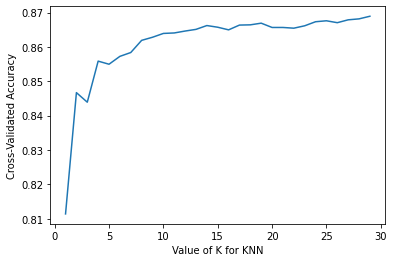

29


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
k_range = range(1,30)
k_scores = []
max=0
max_number=0
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,Xdata,Ydata,cv=5,scoring='accuracy')
    k_scores.append(scores.mean())
    if(scores.mean()>max):
      max_number=k_number
      max=scores.mean()
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
print(max_number)

In [ ]:
'''from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  Y_pred_knn = knn.predict(X_test)
  acc_knn = knn.score(X_train, y_train)
  acc_knn_test = knn.score(X_test, y_test)
  output('KNN'+str(i),Y_pred_knn,acc_knn,acc_knn_test)'''

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['0']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']] ['0' '0' '0' ... '0' '0' '0']
  Train  accuracy   test  precision  recall  fscore
0  KNN1     100.0  100.0      100.0   100.0   100.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['0']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']] ['0' '0' '0' ... '0' '0' '0']
  Train  accuracy   test  precision  recall  fscore
0  KNN2     100.0  100.0      100.0   100.0   100.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['0']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']] ['0' '0' '0' ... '0' '0' '0']
  Train  accuracy   test  precision  recall  fscore
0  KNN3     100.0  100.0      100.0   100.0   100.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['0']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']] ['0' '0' '0' ... '0' '0' '0']
  Train  accuracy   test  precision  recall  fscore
0  KNN4     100.0  100.0      100.0   100.0   100.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['0']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']] ['0' '0' '0' ... '0' '0' '0']
  Train  accuracy   test  precision  recall  fscore
0  KNN5     100.0  100.0      100.0   100.0   100.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['0']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']] ['0' '0' '0' ... '0' '0' '0']
  Train  accuracy   test  precision  recall  fscore
0  KNN6     100.0  100.0      100.0   100.0   100.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['0']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']] ['0' '0' '0' ... '0' '0' '0']
  Train  accuracy   test  precision  recall  fscore
0  KNN7     100.0  100.0      100.0   100.0   100.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['0']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']] ['0' '0' '0' ... '0' '0' '0']
  Train  accuracy   test  precision  recall  fscore
0  KNN8     100.0  100.0      100.0   100.0   100.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['0']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']] ['0' '0' '0' ... '0' '0' '0']
  Train  accuracy   test  precision  recall  fscore
0  KNN9     100.0  100.0      100.0   100.0   100.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['0']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']] ['0' '0' '0' ... '0' '0' '0']
   Train  accuracy   test  precision  recall  fscore
0  KNN10     100.0  100.0      100.0   100.0   100.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['0']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']] ['0' '0' '0' ... '0' '0' '0']
   Train  accuracy   test  precision  recall  fscore
0  KNN11     100.0  100.0      100.0   100.0   100.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['0']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']] ['0' '0' '0' ... '0' '0' '0']
   Train  accuracy   test  precision  recall  fscore
0  KNN12     100.0  100.0      100.0   100.0   100.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['0']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']] ['0' '0' '0' ... '0' '0' '0']
   Train  accuracy   test  precision  recall  fscore
0  KNN13     100.0  100.0      100.0   100.0   100.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['0']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']] ['0' '0' '0' ... '0' '0' '0']
   Train  accuracy   test  precision  recall  fscore
0  KNN14     100.0  100.0      100.0   100.0   100.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['0']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']] ['0' '0' '0' ... '0' '0' '0']
   Train  accuracy   test  precision  recall  fscore
0  KNN15     100.0  100.0      100.0   100.0   100.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['0']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']] ['0' '0' '0' ... '0' '0' '0']
   Train  accuracy   test  precision  recall  fscore
0  KNN16     100.0  100.0      100.0   100.0   100.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['0']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']] ['0' '0' '0' ... '0' '0' '0']
   Train  accuracy   test  precision  recall  fscore
0  KNN17     100.0  100.0      100.0   100.0   100.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['0']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']] ['0' '0' '0' ... '0' '0' '0']
   Train  accuracy   test  precision  recall  fscore
0  KNN18     100.0  100.0      100.0   100.0   100.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[['0']
 ['0']
 ['0']
 ...
 ['0']
 ['0']
 ['0']] ['0' '0' '0' ... '0' '0' '0']
   Train  accuracy   test  precision  recall  fscore
0  KNN19     100.0  100.0      100.0   100.0   100.0


#### GaussianNB

In [ ]:
from sklearn import naive_bayes
GNB=naive_bayes.GaussianNB()
GNB.fit(X_train,y_train)
Y_pred_GNB=GNB.predict(X_test)
GNB_train_score=GNB.score(X_train, y_train)
GNB_test_score=GNB.score(X_test, y_test)
output("GaussianNB",Y_pred_GNB,GNB_train_score,GNB_test_score)

        Train  accuracy   test  precision  recall  fscore
0  GaussianNB      84.2  77.31      67.46   72.51   68.93


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
Per = Perceptron()
Per.fit(X_train,y_train)
Y_pred_Per=Per.predict(X_test)
Per_train_score=Per.score(X_train, y_train)
Per_test_score=Per.score(X_test, y_test)
output("Perceptron",Y_pred_Per,Per_train_score,Per_test_score)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        Train  accuracy  test  precision  recall  fscore
0  Perceptron     86.36  82.7      72.71   73.72   73.19


#### Stochastic Gradient Decent

In [ ]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()
SGD.fit(X_train,y_train)
Y_pred_SGD=SGD.predict(X_test)
SGD_train_score=SGD.score(X_train, y_train)
SGD_test_score=SGD.score(X_test, y_test)
output("Stochastic Gradient Decent",Y_pred_SGD,SGD_train_score,SGD_test_score)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                        Train  accuracy   test  precision  recall  fscore
0  Stochastic Gradient Decent     87.02  83.15      73.32   73.67   73.49


#### Linear SVC

In [ ]:
from sklearn import svm
Lsvc = svm.LinearSVC(C=10,random_state=10)
Lsvc.fit(X_train,y_train)
Y_pred_Lsvc=Lsvc.predict(X_test)
Lsvc_train_score=Lsvc.score(X_train, y_train)
Lsvc_test_score=Lsvc.score(X_test, y_test)
output("Linear SVC",Y_pred_Lsvc,Lsvc_train_score,Lsvc_test_score)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


        Train  accuracy  test  precision  recall  fscore
0  Linear SVC      86.6  84.5      81.03   63.94   67.14


#### BernoulliNB

In [ ]:
from sklearn.naive_bayes import BernoulliNB
Bnb= BernoulliNB()
Bnb.fit(X_train,y_train)
Y_pred_Bnb=Bnb.predict(X_test)
Bnb_train_score=Bnb.score(X_train, y_train)
Bnb_test_score=Bnb.score(X_test, y_test)
output("BernoulliNB",Y_pred_Bnb,Bnb_train_score,Bnb_test_score)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         Train  accuracy   test  precision  recall  fscore
0  BernoulliNB     78.93  75.47      62.19   63.14   62.61


#### Logistic Regression

In [ ]:
from sklearn import linear_model
lr=linear_model.LogisticRegression()#初始化資料
for i in range(0,4):
  X_test=Xdata.iloc[2878*i:2878*(i+1)]
  y_test=Ydata.iloc[2878*i:2878*(i+1)]
  X_train=pd.concat([Xdata,X_test,X_test]).drop_duplicates(keep=False)
  if(i==0):
    temp=0
  else:
    temp=2878*i
  y_train=pd.concat([Ydata.iloc[0:temp],Ydata.iloc[2878*(i+1):14390]])
  lr.fit(X_train,y_train)#丟入資料
  Y_pred_lr = lr.predict(X_test)
  acc_lr = lr.score(X_train, y_train)
  acc_lr_test = lr.score(X_test, y_test)
  output('LR_train_',Y_pred_lr,acc_lr,acc_lr_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


       Train  accuracy  test  precision  recall  fscore
0  LR_train_     87.02  86.8      79.04   69.66   72.81


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


       Train  accuracy  test  precision  recall  fscore
0  LR_train_     87.09  86.8      79.41   69.57   72.81


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


       Train  accuracy   test  precision  recall  fscore
0  LR_train_     87.67  84.61      76.61   69.76   72.19


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


       Train  accuracy   test  precision  recall  fscore
0  LR_train_     86.76  87.73      82.97   70.17   74.08


In [ ]:
predict_result_lr = lr.predict(predict_data)
'''
Y_pred = lr.predict(predict_data)
predict_result_lr = pd.DataFrame(Y_pred)
predict_result_lr.rename( columns={0: 'ans'}, inplace=True)
predict_ID=predict_data2.index.astype(str)+".0"
print(predict_ID.dtype)
predict_ID=pd.DataFrame(predict_ID)
predict_dataframe = pd.concat([predict_ID,predict_result_lr],axis=1)
predict_dataframe.columns=['id','ans']
print(predict_dataframe['id'].dtype)
predict_dataframe.to_csv('/content/gdrive/MyDrive/資料科學導論/hw1/lr_ans_test.csv',index=False)
'''

object
object


#### Bayesian Regression

In [ ]:
from sklearn.linear_model import BayesianRidge
BayReg=BayesianRidge()
BayReg.fit(X_train,y_train)
Y_pred_BayReg=BayReg.predict(X_test).round(0).astype(int).astype(str)
BayReg_train_score=BayReg.score(X_train, y_train)
BayReg_test_score=BayReg.score(X_test, y_test)
output("Bayesian Regression",Y_pred_BayReg,BayReg_train_score,BayReg_test_score)

                 Train  accuracy   test  precision  recall  fscore
0  Bayesian Regression     31.97  29.08       79.5   68.27   71.52


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Generalized Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
GLR=LinearRegression()
GLR.fit(X_train,y_train)
Y_pred_GLR=GLR.predict(X_test).round(0).astype(int).astype(str)
GLR_train_score=GLR.score(X_train, y_train)
GLR_test_score=GLR.score(X_test, y_test)
output("Generalized Linear Regression",Y_pred_GLR,GLR_train_score,GLR_test_score)

                           Train  accuracy   test  precision  recall  fscore
0  Generalized Linear Regression     31.99  29.03      78.86   68.08   71.23
